### Gaussian High-pass and Low-pass filters in frequency domain



In [111]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import signal
from matplotlib.pyplot import imshow
from PIL import Image
import cv2
from scipy import signal, ndimage
from scipy.fftpack import fft2, fftshift, ifftshift, ifft2
%matplotlib inline


In [2]:
new_im=cv2.imread("fantasy.jpg",0) # convert to greyscale
new_im=cv2.resize(new_im, (512,512))# first width, second height



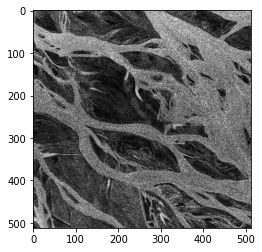

In [3]:
imshow(new_im, cmap='gray')
#new_im


### The Gaussian window is defined by $ w(n)=\exp^{\frac{-1}{2}{\frac{n}{\sigma}}^2}$ where $n$ is the number of pixels in the output window

In [41]:
# create a 2D-gaussian kernel、filter with the same size of the image
kernel = np.outer(signal.gaussian(new_im.shape[0], 5), signal.gaussian(new_im.shape[1], 5))# outer product of two vectors,
#each representing a 1D Gaussian window of size of 5 points

# find Fourier transform of the image f(x,y)
freq = fft2(new_im)
# generate a kernel whose origin is in the top-left corner
kern=ifftshift(kernel) # h(x,y)
# calculate FFT of the kernel
freq_kernel = fft2(kern)
# multiply in the frequency domain
product = freq*freq_kernel
# compute the final result
# take the inverse transform of the product and display the real part
im_out = ifft2(product).real # output blurred image

In [18]:
# scale image to original grey-level intensities in the range from 0 to 255
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 255))
scaler = scaler.fit(im_out)
im_out = scaler.transform(im_out)
im_out


array([[136.92153348, 125.60891302, 116.13533179, ..., 165.67983394,
        163.10499806, 149.66433847],
       [152.99088287, 139.86575525, 128.64543799, ..., 185.98018006,
        182.89984608, 167.58689658],
       [168.11044858, 153.37053538, 140.58589786, ..., 204.78554269,
        201.31837046, 184.35010374],
       ...,
       [ 93.25249352,  87.49739278,  83.37641662, ..., 108.65299362,
        107.99471492, 100.30675021],
       [105.99304022,  98.48583257,  92.67226393, ..., 125.65567897,
        124.33333078, 114.8372147 ],
       [120.89678593, 111.49612217, 103.86090409, ..., 145.11550243,
        143.13932638, 131.68065088]])

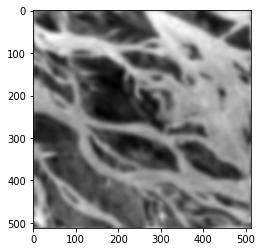

In [42]:
imshow(im_out, cmap='gray')


# Question 1: Is this a high-pass or a low-pass Gaussian filter? By modifying slightly the code above, create a 3-pixel Gaussian kernel and output the resulting image. What do you observe when you narrow the size of the Gaussian wiindow?

- this is a low pass Gaussian filter

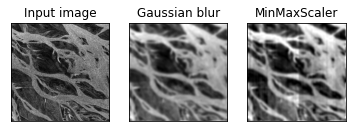

It is clear that image became blurred after adding gaussian blur, but for some reason MinMaxScaler adds noise


In [102]:
# 3-pixel Gaussian kernel
image_3p = cv2.imread("fantasy.jpg",0) # convert to greyscale
image_3p = cv2.resize(image_3p, (512,512))

kernel = np.outer(signal.gaussian(image_3p.shape[0], 5), signal.gaussian(image_3p.shape[1], 5))

freq = fft2(image_3p)

kern = ifftshift(kernel)

freq_kernel = fft2(kern)

product = freq*freq_kernel

im_out_low = ifft2(product).real

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 255))
scaler = scaler.fit(im_out)
im_out_scaled = scaler.transform(im_out)

plt.subplot(131), imshow(image_3p, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(132), imshow(im_out_low, cmap='gray')
plt.title('Gaussian blur'), plt.xticks([]),plt.yticks([])
plt.subplot(133), imshow(im_out_scaled, cmap='gray')
plt.title('MinMaxScaler'), plt.xticks([]),plt.yticks([])
plt.show()
print('It is clear that image became blurred after adding gaussian blur, but for some reason MinMaxScaler adds noise')

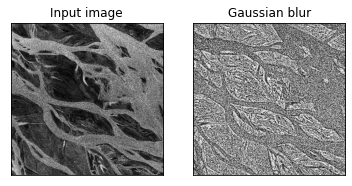

In [112]:
# high-pass Gaussian filtered image is found by subtracting low-pass filtered image from the original one

image_high = cv2.imread("fantasy.jpg",0) # convert to greyscale
image_high = cv2.resize(image_high, (512,512))

lowpass = ndimage.gaussian_filter(image_high, 3)
gauss_highpass = image_high - lowpass

plt.subplot(121), imshow(image_high, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), imshow(gauss_highpass, cmap='gray')
plt.title('Gaussian blur'), plt.xticks([]),plt.yticks([])
plt.show()

### Question 2: What would a high-pass Gaussian filter be useful for in the context of image processing?  

I think it could be useful for sharpening, recognizing contours, image enhancements and other applications
